# Table of contents
1. [Introduction](#introduction)
2. [Numerical relationships](#relplot)
    1. [Sub paragraph](#subparagraph1)
3. [Categorical plots](#catplot)
4. [Distribution plots](#distplot)



## Introduction <a id='introduction'> </a>

### 2 interfaces:
1. axes level : returns matplotlib axes object
2. Figure level (***Preferred***) : returns native seaborn FacetGrid object

No native functions for adding chart titles - drop down to pyplot fig object

## Numerical relationships <a id='relplot'></a>

### kind =scatter , line

### visual channels:
1. x
3. y
3. hue
4. style
5. size
6. palette = 'ch:r=-.5,1=.75'

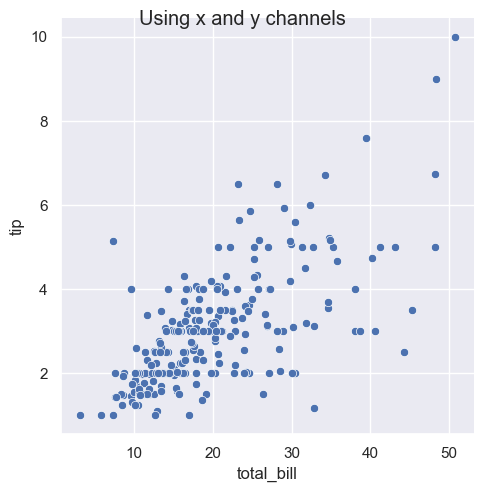

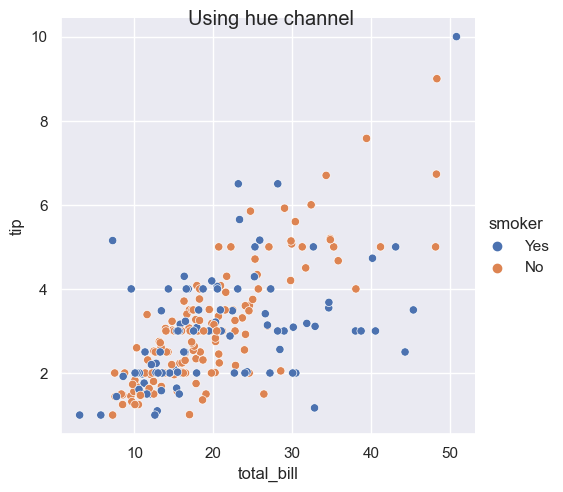

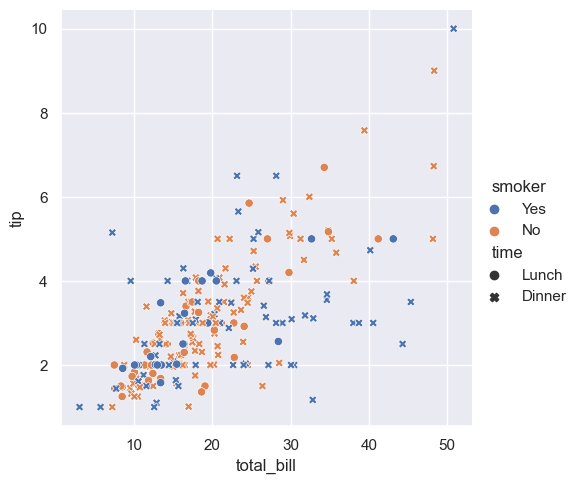

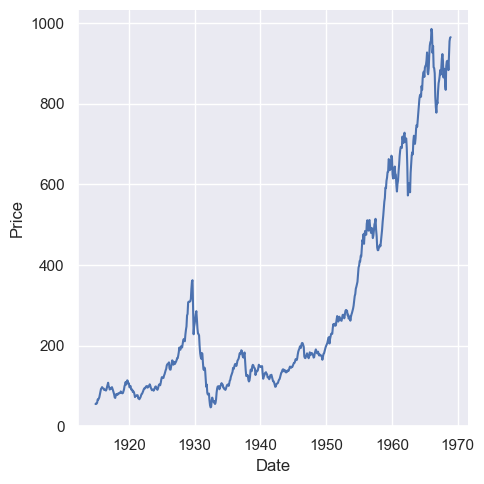

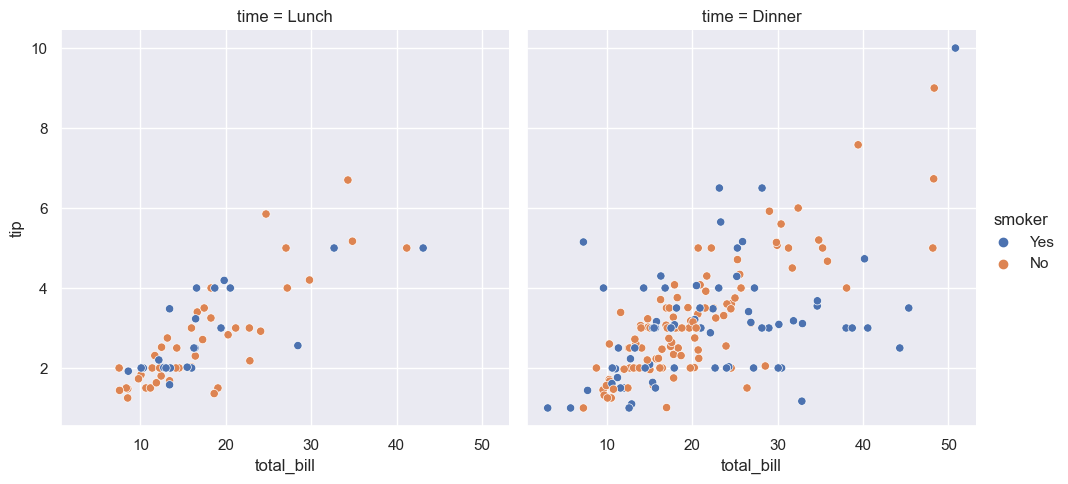

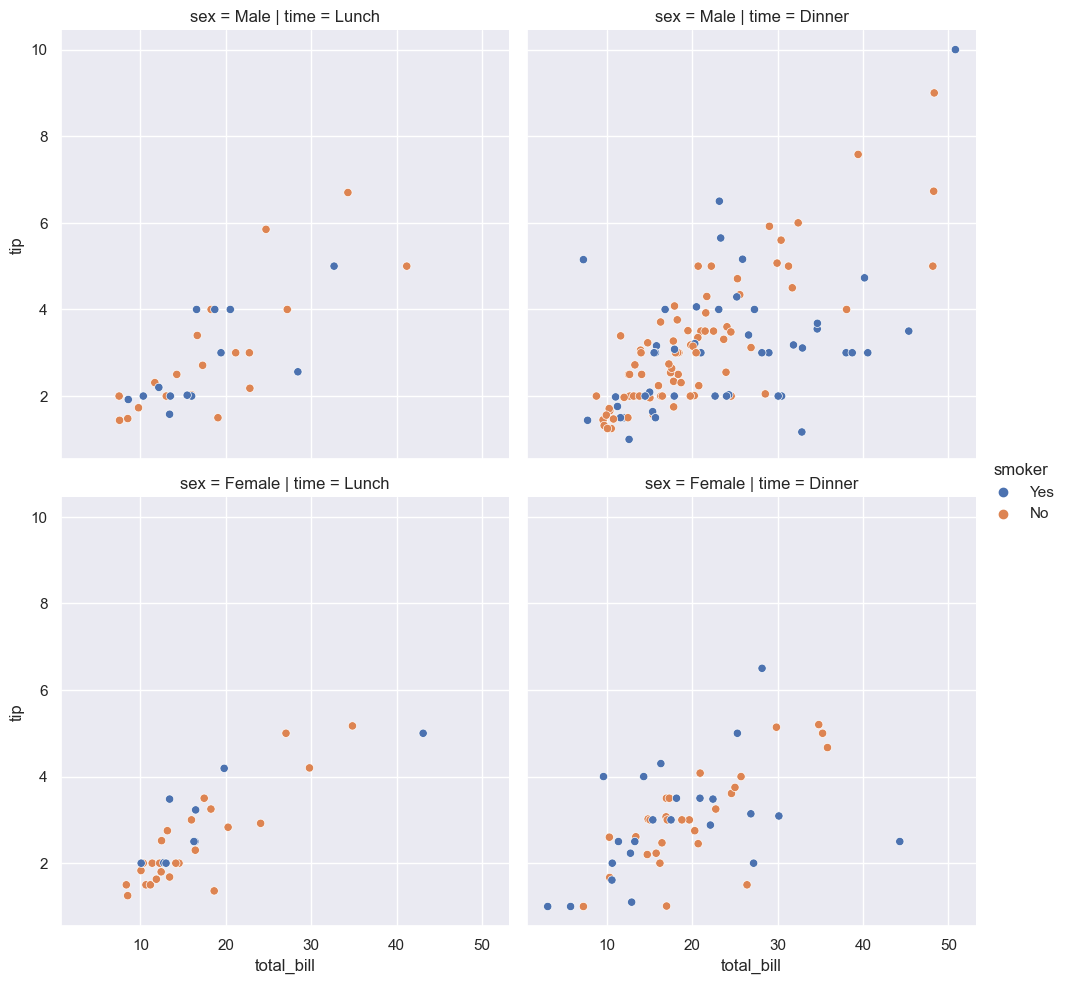

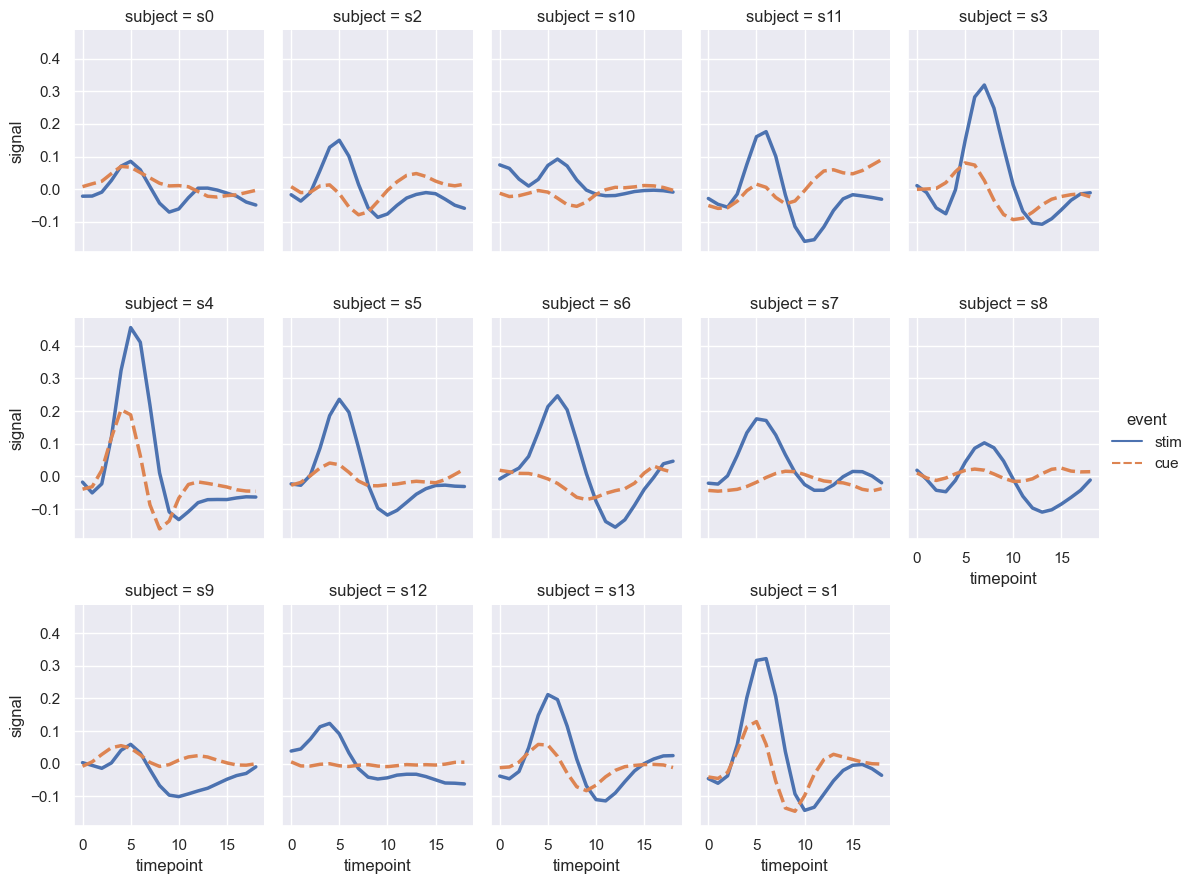

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
scatter=sns.relplot(data=tips, x="total_bill", y="tip",kind='scatter')
scatter.fig.suptitle('Using x and y channels')

# using hue
scatter= sns.relplot(data=tips, x="total_bill", y="tip",hue='smoker')
scatter.fig.suptitle('Using hue channel')

#using style
scatter=sns.relplot(data=tips,x='total_bill',y='tip',hue='smoker',style='time')

#lineplot
dowjones = sns.load_dataset("dowjones")
sns.relplot(data=dowjones, x="Date", y="Price", kind="line")

#subplots with rows
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter',hue="smoker",col='time')

#subplots with rows and columns
sns.relplot(data=tips, x="total_bill", y="tip", kind='scatter',hue="smoker",col='time',row='sex')

#trellis chart
fmri=sns.load_dataset('fmri')
sns.relplot(
    data=fmri.query("region == 'frontal'"), kind="line",
    x="timepoint", y="signal", hue="event", style="event",
    col="subject", col_wrap=5,
    height=3, aspect=.75, linewidth=2.5,
)



# Categorical plots <a id='catplot'></a>
Three different families :
##      a. categorical scatterplots:
        1. strip
        2. swarm

##      b. categorical distribution plots:
        1. boxplot
        2. violinplot
        3. boxenplot

##      c. categorical estimate plots:
        1. pointplot
        2. barplot
        3. countplot

catplot support hue but not other channels like size and style


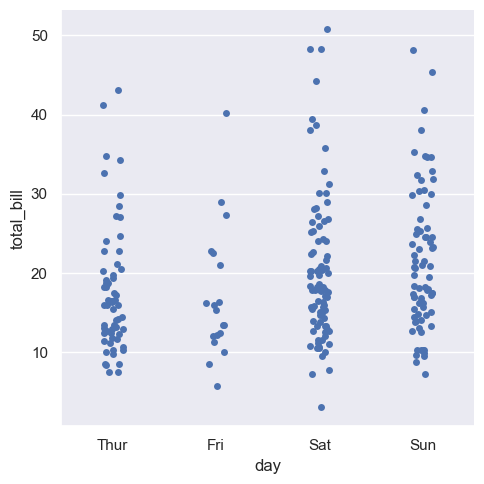

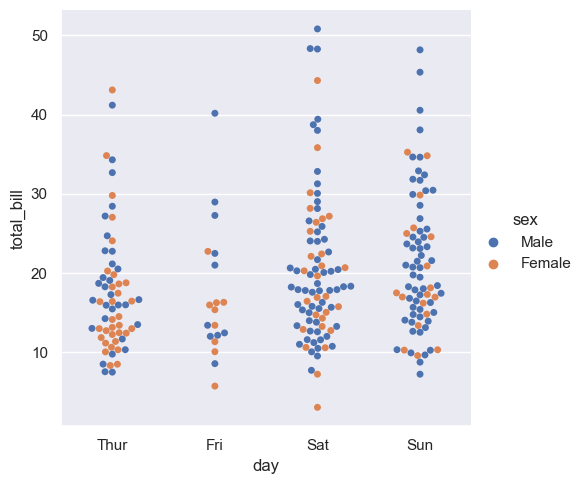

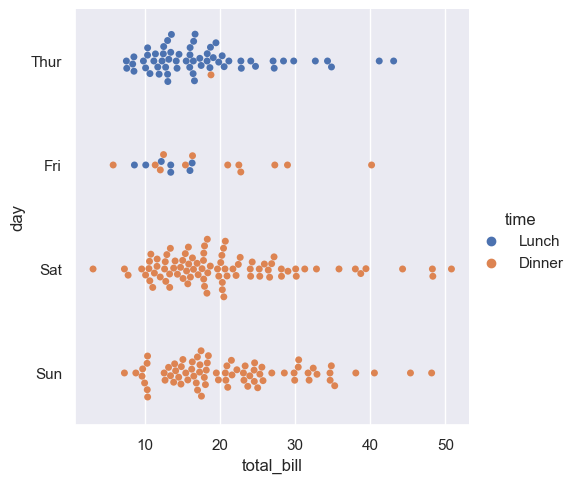

In [9]:
# categorical scatterplot
tips=sns.load_dataset('tips')
sns.catplot(data=tips,x='day',y='total_bill',kind='strip',jitter=True)
sns.catplot(data=tips,x='day',y='total_bill',kind='swarm', hue='sex') #swarm is okay only for small datasets

# if the category axis needs a certain order either use pandas categorical dtype or order=["No", "Yes"] in seaborn
##================####
# We’ve referred to the idea of “categorical axis”. In these examples, that’s always corresponded to the horizontal axis. But it’s often helpful to put the categorical variable on the vertical axis (particularly when the category names are relatively long or there are many categories). To do this, swap the assignment of variables to axes:
sns.catplot(data=tips,x='total_bill',y='day',hue='time',kind='swarm')

## Distribution plot <a id='distplot'></a>